In [1]:
!pip install requests python-dotenv pandas matplotlib


In [4]:
import os

# Put your real OpenET API key here:
OPENET_API_KEY = "vRLMtoTSDgG8Fh2aafy2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1"

# Optional: also store it in environment so functions can use os.getenv
os.environ["vRLMtoTSDgG8Fh2aafy2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1"] = OPENET_API_KEY

if not OPENET_API_KEY or OPENET_API_KEY == "vRLMtoTSDgG8Fh2aafy 2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1":
    raise ValueError("Please set your OpenET API key above.")


In [12]:
import requests
from datetime import date

BASE_URL = "https://openet-api.org"

def get_openet_et_point(
    lon: float,
    lat: float,
    start_date: str,
    end_date: str,
    interval: str = "daily",
    variable: str = "ET",
    units: str = "mm",
):
    api_key = os.getenv("vRLMtoTSDgG8Fh2aafy2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1")
    if not api_key:
        raise RuntimeError("OPENET_API_KEY not set.")

    url = f"{BASE_URL}/raster/timeseries/point"
    headers = {"Authorization": api_key}

    payload = {
        "date_range": [start_date, end_date],
        "interval": interval,
        "geometry": [lon, lat],
        "model": "Ensemble",
        "variable": variable,       # "ET" or "ETo"
        "reference_et": "gridMET",
        "units": units,
        "file_format": "JSON",
    }

    resp = requests.post(url, headers=headers, json=payload, timeout=60)
    print("Status code:", resp.status_code)

    if not resp.ok:
        print(resp.text[:500])
        resp.raise_for_status()

    return resp.json()


In [13]:
# Example: somewhere near Corvallis
lon = -123.25
lat = 44.56
start_date = "2024-06-01"
end_date = "2024-06-07"

data = get_openet_et_point(lon, lat, start_date, end_date)

# Peek at the top-level structure
import json
print(json.dumps(data, indent=2)[:1200])


Status code: 401
{"detail":"Invalid API credentials."}


HTTPError: 401 Client Error: Unauthorized for url: https://openet-api.org/raster/timeseries/point

In [7]:
import requests

API_KEY = "4zGVZfBoW2MWJ1nAwpdjvFEmsMYJ1Ll09fmLrq7c2a7lYzqtt0h7REB18ezn"  # <- from openet-api.org account/keys

url = "https://openet-api.org/raster/timeseries/point"

headers = {
    "Authorization": API_KEY,
    "accept": "application/json",
    "Content-Type": "application/json",
}

payload = {
    "date_range": ["2020-01-01", "2020-01-10"],
    "interval": "daily",
    "geometry": [-123.25, 44.56],  # lon, lat
    "model": "Ensemble",
    "variable": "ET",
    "reference_et": "gridMET",
    "units": "mm",
    "file_format": "JSON",
}

resp = requests.post(url, headers=headers, json=payload, timeout=60)
print("Status code:", resp.status_code)
print(resp.text[:500])


Status code: 200
[
    {
        "time":"2020-01-01",
        "et":0.999
    },
    {
        "time":"2020-01-02",
        "et":0.74
    },
    {
        "time":"2020-01-03",
        "et":0.925
    },
    {
        "time":"2020-01-04",
        "et":0.712
    },
    {
        "time":"2020-01-05",
        "et":1.205
    },
    {
        "time":"2020-01-06",
        "et":0.835
    },
    {
        "time":"2020-01-07",
        "et":0.904
    },
    {
        "time":"2020-01-08",
        "et":0.424
    },
    {
     


In [8]:
import pandas as pd

data = resp.json()          # parse JSON
df = pd.DataFrame(data)     # list[dict] -> table

df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time")

df.head()


,time,et
0,2020-01-01,0.999
1,2020-01-02,0.740
2,2020-01-03,0.925
3,2020-01-04,0.712
4,2020-01-05,1.205


In [14]:
import requests

API_KEY = "vRLMtoTSDgG8Fh2aafy2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1"  # keep your working key here

def get_openet_et_point(lon, lat, start_date, end_date):
    url = "https://openet-api.org/raster/timeseries/point"
    headers = {
        "Authorization": API_KEY,
        "accept": "application/json",
        "Content-Type": "application/json",
    }
    payload = {
        "date_range": [start_date, end_date],
        "interval": "daily",
        "geometry": [lon, lat],
        "model": "Ensemble",
        "variable": "ET",
        "reference_et": "gridMET",
        "units": "mm",
        "file_format": "JSON",
    }

    resp = requests.post(url, headers=headers, json=payload, timeout=60)
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"])
    df = df.sort_values("time")
    return df


In [15]:
df = get_openet_et_point(-123.25, 44.56, "2020-01-01", "2020-01-10")
df.head()


HTTPError: 401 Client Error: Unauthorized for url: https://openet-api.org/raster/timeseries/point

In [16]:
import pandas as pd
import requests

# Use the SAME key that gave you Status code: 200
API_KEY = "vRLMtoTSDgG8Fh2aafy2deqFQdzZS79DsTOG2MtN3uMtq6oHBW7Ed5oCzsU1"

print("API_KEY length:", len(API_KEY))  # just to check it's not empty


API_KEY length: 60


In [17]:
def get_openet_et_point(lon, lat, start_date, end_date):
    url = "https://openet-api.org/raster/timeseries/point"
    headers = {
        "Authorization": API_KEY,          # <- uses the global we set above
        "accept": "application/json",
        "Content-Type": "application/json",
    }
    payload = {
        "date_range": [start_date, end_date],
        "interval": "daily",
        "geometry": [lon, lat],
        "model": "Ensemble",
        "variable": "ET",
        "reference_et": "gridMET",
        "units": "mm",
        "file_format": "JSON",
    }

    resp = requests.post(url, headers=headers, json=payload, timeout=60)
    print("Status code from function:", resp.status_code)
    print(resp.text[:200])  # small preview for debugging

    resp.raise_for_status()  # will throw if 401/400/etc

    data = resp.json()
    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"])
    df = df.sort_values("time")
    return df


In [18]:
df = get_openet_et_point(-123.25, 44.56, "2020-01-01", "2020-01-10")
df.head()


Status code from function: 401
{"detail":"Invalid API credentials."}


HTTPError: 401 Client Error: Unauthorized for url: https://openet-api.org/raster/timeseries/point

In [19]:
import requests
import pandas as pd

# 1. Put the SAME key here that worked in your “Status code: 200” test
API_KEY = "4zGVZfBoW2MWJ1nAwpdjvFEmsMYJ1Ll09fmLrq7c2a7lYzqtt0h7REB18ezn"

print("Global API_KEY repr:", repr(API_KEY), "len:", len(API_KEY))

def get_openet_et_point(api_key, lon, lat, start_date, end_date):
    print("Function got api_key repr:", repr(api_key), "len:", len(api_key))

    url = "https://openet-api.org/raster/timeseries/point"
    headers = {
        "Authorization": api_key,
        "accept": "application/json",
        "Content-Type": "application/json",
    }
    payload = {
        "date_range": [start_date, end_date],
        "interval": "daily",
        "geometry": [lon, lat],
        "model": "Ensemble",
        "variable": "ET",
        "reference_et": "gridMET",
        "units": "mm",
        "file_format": "JSON",
    }

    resp = requests.post(url, headers=headers, json=payload, timeout=60)
    print("Status code from function:", resp.status_code)
    print("Preview:", resp.text[:200])

    resp.raise_for_status()  # will throw if 401/400/etc

    data = resp.json()
    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"])
    df = df.sort_values("time")
    return df


Global API_KEY repr: '4zGVZfBoW2MWJ1nAwpdjvFEmsMYJ1Ll09fmLrq7c2a7lYzqtt0h7REB18ezn' len: 60


In [20]:
df = get_openet_et_point(
    API_KEY,
    -123.25,
    44.56,
    "2020-01-01",
    "2020-01-10"
)

df.head()


Function got api_key repr: '4zGVZfBoW2MWJ1nAwpdjvFEmsMYJ1Ll09fmLrq7c2a7lYzqtt0h7REB18ezn' len: 60
Status code from function: 200
Preview: [
    {
        "time":"2020-01-01",
        "et":0.999
    },
    {
        "time":"2020-01-02",
        "et":0.74
    },
    {
        "time":"2020-01-03",
        "et":0.925
    },
    {
        "t


,time,et
0,2020-01-01,0.999
1,2020-01-02,0.740
2,2020-01-03,0.925
3,2020-01-04,0.712
4,2020-01-05,1.205


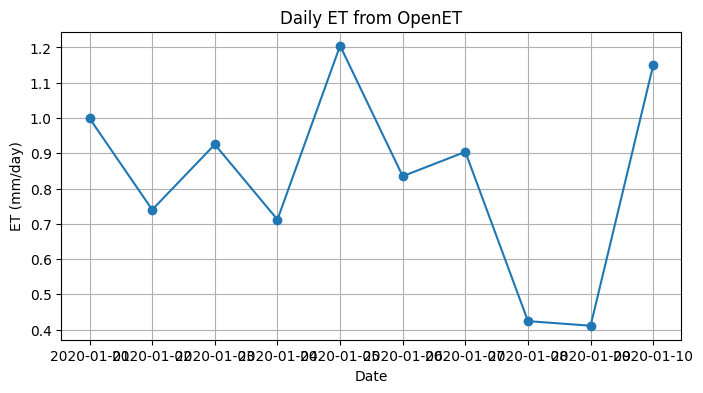

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df["time"], df["et"], marker="o")
plt.xlabel("Date")
plt.ylabel("ET (mm/day)")
plt.title("Daily ET from OpenET")
plt.grid(True)
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Add dummy rainfall (just for visualization)
# Here: some days have rain, some 0
np.random.seed(0)  # so it is repeatable
n = len(df)
base_rain = np.random.choice([0, 0, 0, 2, 5], size=n)  # many zeros, some 2–5 mm
df["rain_mm"] = base_rain

df[["time", "et", "rain_mm"]].head()


,time,et,rain_mm
0,2020-01-01,0.999,5
1,2020-01-02,0.740,0
2,2020-01-03,0.925,2
3,2020-01-04,0.712,2
4,2020-01-05,1.205,2


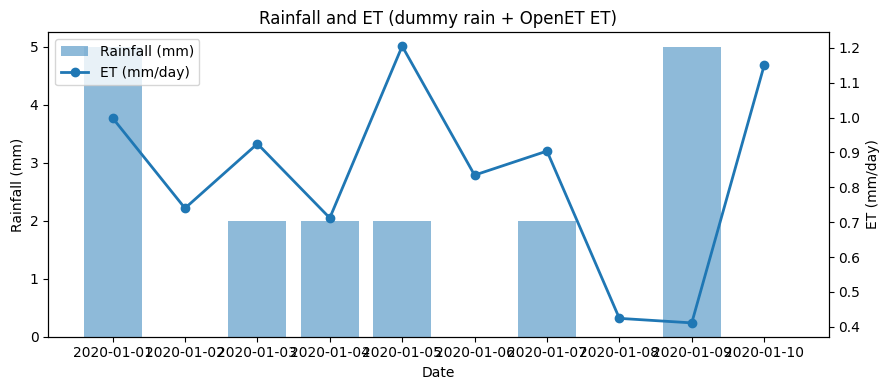

In [23]:
fig, ax1 = plt.subplots(figsize=(9, 4))

# Left axis: Rainfall as bars
ax1.bar(df["time"], df["rain_mm"], alpha=0.5, label="Rainfall (mm)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Rainfall (mm)")
ax1.tick_params(axis="y")

# Right axis: ET as line
ax2 = ax1.twinx()
ax2.plot(df["time"], df["et"], marker="o", linewidth=2, label="ET (mm/day)")
ax2.set_ylabel("ET (mm/day)")
ax2.tick_params(axis="y")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("Rainfall and ET (dummy rain + OpenET ET)")
fig.tight_layout()
plt.show()
